In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
data_regions=pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

<AxesSubplot:>

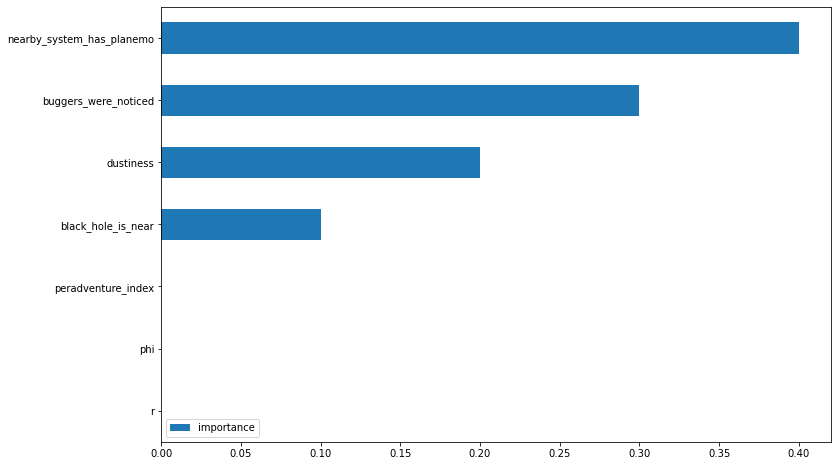

In [3]:

X_train=data_regions.drop('dangerous',axis=1)
y_train=data_regions['dangerous']
clf_rf = RandomForestClassifier(criterion='entropy',random_state=0)
parametrs = {'n_estimators':  range(10, 20, 10) , 'max_depth': range(1, 3, 2)}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3,n_jobs=-1)
grid_search_cv_clf.fit(X_train, y_train)
best_clf=grid_search_cv_clf.best_estimator_
best_clf.feature_importances_
imp = pd.DataFrame(best_clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))